In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [2]:
file = pd.read_json("../integration/src/matchmaking_test.json")

In [3]:
df = file.T

In [4]:
df.shape

(167, 13)

In [112]:
#df = file.reset_index()

In [5]:
df.head()

,automated_readability_index,coleman_liau_index,consolidated_score,dale_chall_readability score,difficult_words,doc_length,flesch_kincaid_grade_level,flesch_reading_ease,grade,gunning_fog,linsear_write_formula,quote_count,smog_index
3132,20.2,6.92,7.0,6.67,14.0,1369.0,15.9,60.15,3.0,17.95,25.00,6.0,9.3
3104,4.2,4.17,5.0,6.00,18.0,847.0,4.1,90.80,3.0,6.19,10.40,0.0,6.4
3103,13.9,5.70,14.0,6.62,14.0,828.0,11.6,71.41,3.0,14.32,13.25,1.0,8.2
3117,49.8,4.84,41.0,10.60,11.0,507.0,40.7,-4.31,3.0,44.68,54.00,0.0,0.0
3102,4.6,4.17,5.0,5.95,37.0,1832.0,4.3,90.29,3.0,7.22,10.80,0.0,8.0


In [6]:
df.dtypes

automated_readability_index     float64
coleman_liau_index              float64
consolidated_score              float64
dale_chall_readability score    float64
difficult_words                 float64
doc_length                      float64
flesch_kincaid_grade_level      float64
flesch_reading_ease             float64
grade                           float64
gunning_fog                     float64
linsear_write_formula           float64
quote_count                     float64
smog_index                      float64
dtype: object

In [12]:
#df = df.rename(columns={"index":"story_id"})


In [115]:
#df.dtypes

In [7]:
scaler = StandardScaler()

In [ ]:
#target = 'story_id'

#X = df.drop(columns = [target])
#y = df[target]

In [28]:
X = df[['doc_length','quote_count','difficult_words','grade']]

In [29]:
norm_X = scaler.fit_transform(X)
#norm_X

### for K Means clustering

In [33]:
model = KMeans(n_clusters = 6)
labels = model.fit_predict(norm_X)

In [34]:
df['grp'] = labels

In [35]:
df['grp'].value_counts()

0    53
2    51
5    25
4    23
1    12
3     3
Name: grp, dtype: int64

### For agglomarative clustering

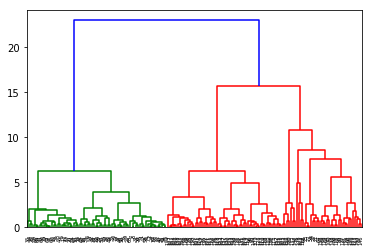

In [36]:
dendrogram = sch.dendrogram(sch.linkage(norm_X, method='ward'))

In [49]:
model = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
model.fit(norm_X)
labels = model.labels_

In [50]:
df['grp_hier'] = labels

In [51]:
df['grp_hier'].value_counts()

2    44
1    32
7    26
6    25
8    11
4    10
5     8
3     7
0     4
Name: grp_hier, dtype: int64

In [52]:
grp = df.groupby('grp_hier')

In [53]:
print(grp.groups)

{0: Int64Index([5254, 5213, 5235, 5234], dtype='int64'), 1: Int64Index([5209, 5207, 5255, 5239, 5230, 5208, 5249, 5203, 5204, 5257, 5261,
            5259, 5233, 5258, 5256, 5218, 5244, 5243, 5221, 5217, 5115, 5123,
            5114, 5109, 5101, 5111, 5116, 5120, 5121, 5103, 5104, 5105],
           dtype='int64'), 2: Int64Index([3132, 3104, 3103, 3129, 3116, 3111, 3118, 3128, 3109, 3107, 3108,
            3112, 3123, 3124, 3122, 3114, 3113, 3245, 3216, 3211, 3218, 3220,
            3243, 3244, 3221, 3226, 3219, 3210, 3217, 3232, 3204, 3203, 3234,
            3215, 3223, 3224, 3248, 3241, 3246, 3247, 3239, 3201, 3208, 3237],
           dtype='int64'), 3: Int64Index([5262, 5247, 5219, 5107, 5129, 5118, 5117], dtype='int64'), 4: Int64Index([5236, 5252, 5223, 5242, 5245, 5220, 5124, 5113, 5131, 5130], dtype='int64'), 5: Int64Index([3102, 3101, 3130, 3115, 3212, 3213, 3209, 3230], dtype='int64'), 6: Int64Index([5238, 5263, 5264, 5237, 5246, 5225, 5214, 5240, 5232, 5250, 5202,
            52

In [55]:
id_list = [3132, 3104, 3103, 3129, 3116, 3111, 3118, 3128, 3109, 3107, 3108,
            3112, 3123, 3124, 3122, 3114, 3113, 3245, 3216, 3211, 3218, 3220,
            3243, 3244, 3221, 3226, 3219, 3210, 3217, 3232, 3204, 3203, 3234,
            3215, 3223, 3224, 3248, 3241, 3246, 3247, 3239, 3201, 3208, 3237] 

In [59]:
print(id_list)

[3132, 3104, 3103, 3129, 3116, 3111, 3118, 3128, 3109, 3107, 3108, 3112, 3123, 3124, 3122, 3114, 3113, 3245, 3216, 3211, 3218, 3220, 3243, 3244, 3221, 3226, 3219, 3210, 3217, 3232, 3204, 3203, 3234, 3215, 3223, 3224, 3248, 3241, 3246, 3247, 3239, 3201, 3208, 3237]


In [57]:
print(*id_list, sep = "\n")

3132
3104
3103
3129
3116
3111
3118
3128
3109
3107
3108
3112
3123
3124
3122
3114
3113
3245
3216
3211
3218
3220
3243
3244
3221
3226
3219
3210
3217
3232
3204
3203
3234
3215
3223
3224
3248
3241
3246
3247
3239
3201
3208
3237
